# spectra hetg acis cc 



In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 16596 evt1,flt,asol,mtl
mv -fv 16596/{primary,secondary}/*.fits.gz .
gunzip -f *.fits.gz
rmdir 16596/primary 
rmdir -p 16596/secondary



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       75 Mb  ####################            1 s  71149.7 kb/s
  asol     fits        2 Mb  ####################          < 1 s  35880.7 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  34808.3 kb/s
  flt      fits        6 Kb  ####################          < 1 s  538.6 kb/s

      Total download size for ObsId 16596 = 79 Mb
      Total download time for ObsId 16596 = 1 s

'16596/primary/pcadf16596_000N001_asol1.fits.gz' -> './pcadf16596_000N001_asol1.fits.gz'
'16596/secondary/acisf16596_000N003_evt1.fits.gz' -> './acisf16596_000N003_evt1.fits.gz'
'16596/secondary/acisf16596_000N003_flt1.fits.gz' -> './acisf16596_000N003_flt1.fits.gz'
'16596/secondary/acisf16596_000N003_mtl1.fits.gz' -> './acisf16596_000N003_mtl1.fits.gz'


## tgdetect2


In [3]:
pset tgdetect2 infile=acisf16596_000N003_evt1.fits
pset tgdetect2 outfile=acis_16596_src1a.fits
tgdetect2 mode=h clobber=yes

In [4]:
dmlist "acis_16596_src1a.fits[cols x,y,shape,r]" data,clean

#  POS(X,Y)                                 SHAPE        R[2]
             4106.50      4223.6263134421 ellipse              4.3540382385                    0


In [5]:
dmtcalc acis_16596_src1a.fits acis_16596_modsrc1a.fits exp="r=r;r[1]=1" cl+

[1] 56709
[1]+  Done                    ds9 acisf16596_000N003_evt1.fits -pan to 4106.5 4223.6 physical -scale log -zoom 8 -region acis_16596_modsrc1a.fits -saveimage png ds9_01.png


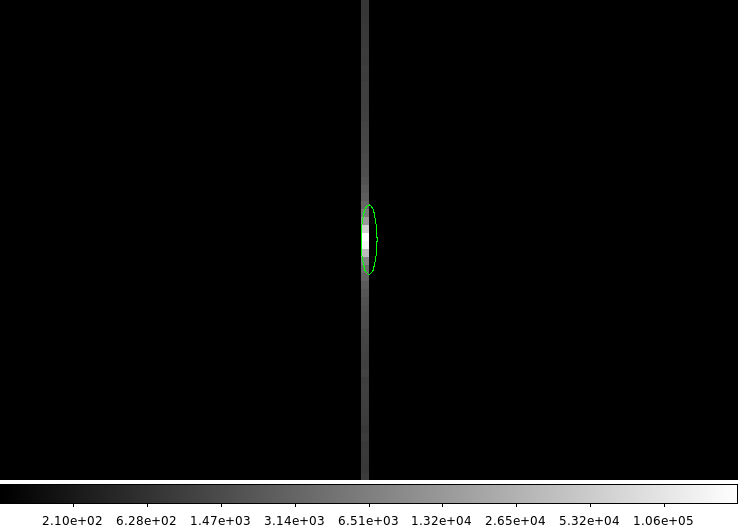

In [8]:
ds9 acisf16596_000N003_evt1.fits \
  -pan to  4106.5 4223.6 physical \
  -scale log -zoom 8 \
  -region acis_16596_modsrc1a.fits \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

## tgcreate_mask


In [9]:
pset tg_create_mask infile=acisf16596_000N003_evt1.fits
pset tg_create_mask outfile=acis_16596_msk1a.fits
pset tg_create_mask input_pos_tab=acis_16596_src1a.fits
tg_create_mask mode=h clob+


[1] 56823
[1]+  Done                    ds9 acisf16596_000N003_evt1.fits -pan to 4071.5 4188.5 physical -scale log -bin factor 2 -region acis_16596_msk1a.fits -saveimage png ds9_02.png


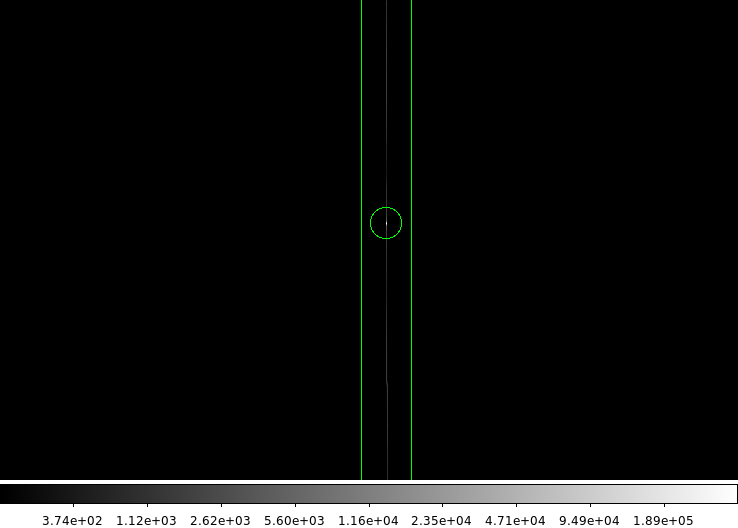

In [10]:
ds9 acisf16596_000N003_evt1.fits \
  -pan to  4071.5 4188.5 physical \
  -scale log -bin factor 2 \
  -region acis_16596_msk1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## Boot Strap

## Tre number 1

In [11]:
pset tg_resolve_events infile=acisf16596_000N003_evt1.fits
pset tg_resolve_events outfile=acis_16596_tmp_evt1a.fits
pset tg_resolve_events regionfile=acis_16596_msk1a.fits
pset tg_resolve_events acaofffile=pcadf16596_000N001_asol1.fits


In [12]:
dmkeypar acisf16596_000N003_evt1.fits readmode echo+

CONTINUOUS


In [13]:
dmkeypar acisf16596_000N003_evt1.fits datamode echo+

CC33_GRADED


In [14]:
pset tg_resolve_events eventdef=")ccgrdlev1a"
pset tg_resolve_events osipfile="none"
pset tg_resolve_events osort_lo=0.3
pset tg_resolve_events osort_hi=0.3
tg_resolve_events mode=h clob+

### APE 

In [15]:
pset acis_process_events infile=acis_16596_tmp_evt1a.fits
pset acis_process_events outfile=acis_16596_tmp2_evt1a.fits
pset acis_process_events mtlfile=acisf16596_000N003_mtl1.fits
pset acis_process_events badpixfile=none
pset acis_process_events acaofffile=pcadf16596_000N001_asol1.fits
pset acis_process_events eventdef=")ccgrdlev1a"
acis_process_events mode=h clob+


# acis_process_events (CIAO 4.14): WARNING: CALDB search for 'GRDIMG' returned 10 files, using first file returned.



In [16]:
summarize_status_bits acis_16596_tmp2_evt1a.fits 


BitName    Bit  NumEvt   %Evt  BitDesc
-------    ---  ------   ----  -------
BADPIX       4  108953    5.6  Center of event island falls on bad pixel
BADPIXE      5  105107    5.4  Surrounding event island falls on bad pixel
DESTREAK    15   28954    1.5  Horizontal streak identified by destreak tool


### TRE number 2

In [17]:
punlearn tg_resolve_events
pset tg_resolve_events infile=acis_16596_tmp2_evt1a.fits
pset tg_resolve_events outfile=acis_16596_evt1a.fits
pset tg_resolve_events regionfile=acis_16596_msk1a.fits
pset tg_resolve_events acaofffile=pcadf16596_000N001_asol1.fits
pset tg_resolve_events eventdef=")ccgrdlev1a"
pset tg_resolve_events osipfile="CALDB"
tg_resolve_events mode=h clob+


## Create L2

In [18]:
dmcopy "acis_16596_evt1a.fits[EVENTS][grade=0,2,3,4,6,status=0]" \
      acis_16596_flt1_evt1a.fits opt=all clob+

In [19]:
 dmcopy \
      "acis_16596_flt1_evt1a.fits[EVENTS][@acisf16596_000N003_flt1.fits][cols -phas]" \
      acis_16596_evt2.fits opt="" clob+


In [20]:
dmappend \
      "acis_16596_flt1_evt1a.fits[region][subspace -time]" \
      acis_16596_evt2.fits

## Extract spectra

In [21]:
pset tgextract infile=acis_16596_evt2.fits
pset tgextract outfile=acis_16596_pha2.fits
tgextract mode=h clob+

In [22]:
dmlist acis_16596_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acis_16596_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 12       rows
Block    3: REGION                         Table        10 cols x 36       rows


In [23]:
dmlist acis_16596_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[8192]                 

# Cleanup


In [ ]:
/bin/rm -f acisf* pcadf* 
